# Objective

The objective of this notebook is to do regression analysis using linear regression on the house price dataset.

Author: Satyanarayan Pati<br>
Date: Jan 29, 2025

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-pricing-dataset/house_prices.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-pricing-dataset/house_prices.csv")
df.shape

(21613, 21)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Description:
------------
This dataset contains information on 21,613 properties, making it a comprehensive resource for exploring real estate market trends and building predictive models for house prices. The data includes various features capturing property details, location, and market conditions, providing ample opportunities for data exploration, visualization, and machine learning applications.

Key Features:
-------------
General Information:

1. id: Unique identifier for each property.
2. date: Date of sale.

Price Details:
--------------
3. price: Sale price of the house.

Property Features:
------------------
4. bedrooms: Number of bedrooms.
5. bathrooms: Number of bathrooms (including partials as fractions).
6. sqft_living: Living space area in square feet.
7. sqft_lot: Lot size in square feet.
8. floors: Number of floors.
9. waterfront: Whether the property has a waterfront view.
10. view: Quality of the view rating.
11. condition: Overall condition of the house.
12. grade: Grade of construction and design (scale of 1–13).

Additional Metrics:
-------------------
13. sqft_above: Square footage of the property above ground.
14. sqft_basement: Basement area in square feet.
15. yr_built: Year the property was built.
16. yr_renovated: Year of last renovation.

Location Coordinates:
---------------------
17. zipcode: ZIP code of the property.
18. lat and long: Latitude and longitude coordinates.

Neighbor Comparisons:
---------------------
19. sqft_living15: Average living space of 15 nearest properties.
20. sqft_lot15: Average lot size of 15 nearest properties.

Use Cases:
----------
Predicting house prices using regression models.
Identifying the impact of various features (e.g., number of bedrooms, location) on property prices.
Analyzing market trends and spatial distribution of real estate prices.
This dataset is a valuable resource for anyone interested in real estate analytics, machine learning, or geographic data visualization.

In [4]:
# We need to select the numerical features from the dataset as we are going to do regression analysis

numeric_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
                    "sqft_above", "sqft_basement", "price"]

In [5]:
selected_df = df[numeric_features]

In [6]:
# Lets see each variables characteristics
selected_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1788.390691,291.509045,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,828.090978,442.575043,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,290.000000,0.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1190.000000,0.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,0.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2210.000000,560.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,7.700000e+06


## Issues with the data
1. 0 values in bedrooms, bathroom and basements. Probably null values and imputed
2. High values of bedroom and bathroom count.
3. Unusually larger and smaller sqft measurements

In [7]:
selected_df[selected_df['bedrooms']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
875,0,0.00,3064,4764,3064,0,1095000.0
3119,0,0.00,1470,979,1470,0,380000.0
3467,0,1.50,1430,1650,1430,0,288000.0
4868,0,1.00,390,5900,390,0,228000.0
6994,0,0.00,4810,28008,4810,0,1295650.0
8477,0,2.50,2290,8319,2290,0,339950.0
8484,0,2.50,1810,5669,1810,0,240000.0
9773,0,0.00,2460,8049,2460,0,355000.0
9854,0,0.00,1470,4800,1470,0,235000.0
12653,0,2.50,1490,7111,1490,0,320000.0


In [8]:
selected_df[selected_df['bathrooms']==0]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
875,0,0.0,3064,4764,3064,0,1095000.0
1149,1,0.0,670,43377,670,0,75000.0
3119,0,0.0,1470,979,1470,0,380000.0
5832,1,0.0,600,24501,600,0,280000.0
6994,0,0.0,4810,28008,4810,0,1295650.0
9773,0,0.0,2460,8049,2460,0,355000.0
9854,0,0.0,1470,4800,1470,0,235000.0
10481,1,0.0,690,23244,690,0,484000.0
14423,0,0.0,844,4269,844,0,139950.0
19452,0,0.0,290,20875,290,0,142000.0


In [9]:
selected_df[(selected_df['bathrooms']==0)&(selected_df['bedrooms']==0)]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
875,0,0.0,3064,4764,3064,0,1095000.0
3119,0,0.0,1470,979,1470,0,380000.0
6994,0,0.0,4810,28008,4810,0,1295650.0
9773,0,0.0,2460,8049,2460,0,355000.0
9854,0,0.0,1470,4800,1470,0,235000.0
14423,0,0.0,844,4269,844,0,139950.0
19452,0,0.0,290,20875,290,0,142000.0


Feature Consistency Checks


1. Verify sqft_above + sqft_basement = sqft_living
2. Ensure sqft_lot values are greater than sqft_living

In [10]:
selected_df[selected_df['sqft_above'] + selected_df['sqft_basement'] != selected_df['sqft_living']]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price


In [11]:
# We should drop these values where sqft_lot values are greater than sqft_living

selected_df2 = selected_df[selected_df['sqft_lot'] > selected_df['sqft_living']]
selected_df2.shape

(20824, 7)

## Assumptions of the linear model
1. Linearity: The relationship between independent (X) and dependent (Y) variables should be linear
2. Independence of Observations: Each observation should be independent of others
3. Homoscedasticity (Equal Variance): The variance of residuals should be constant across all predicted values
4. Normality of Residuals: The residuals should be normally distributed
5. No Multicollinearity: Independent variables should not be highly correlated with each other
6. No Significant Outliers: Outliers can heavily influence the regression line

bedrooms


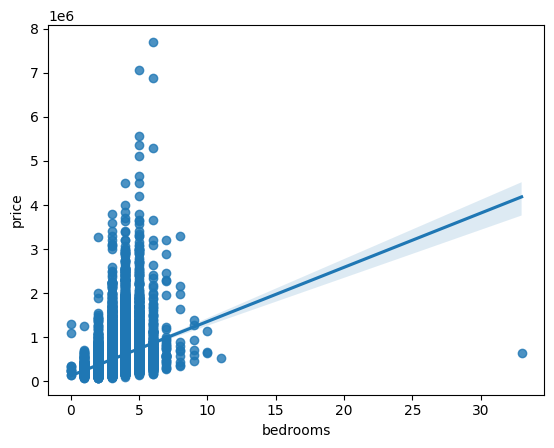

bathrooms


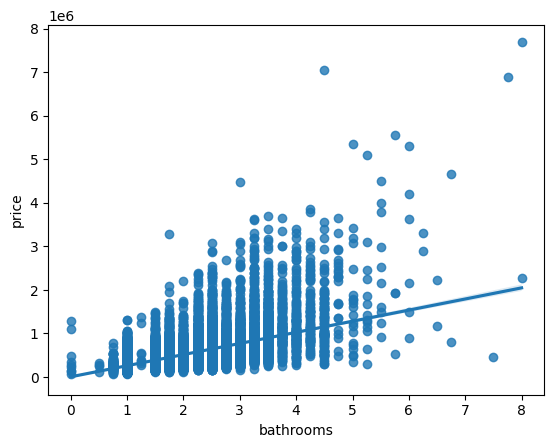

sqft_living


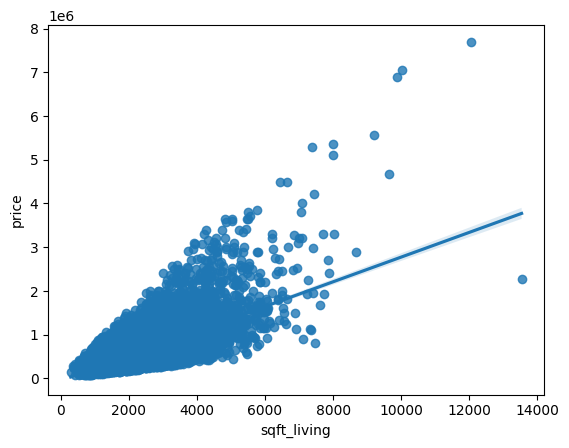

sqft_lot


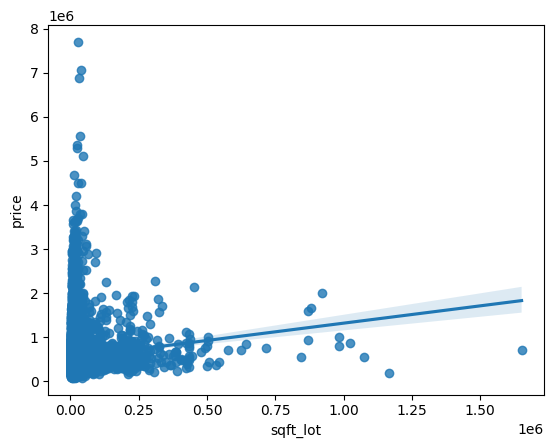

sqft_above


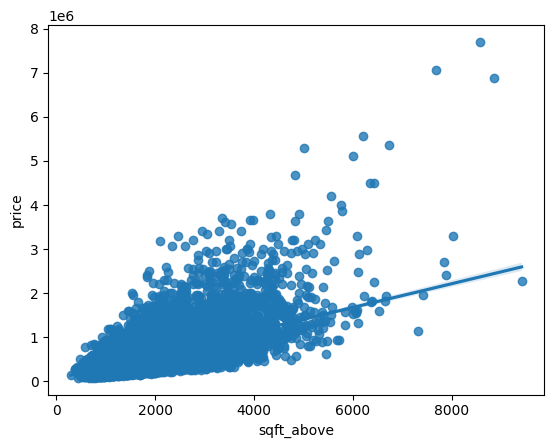

sqft_basement


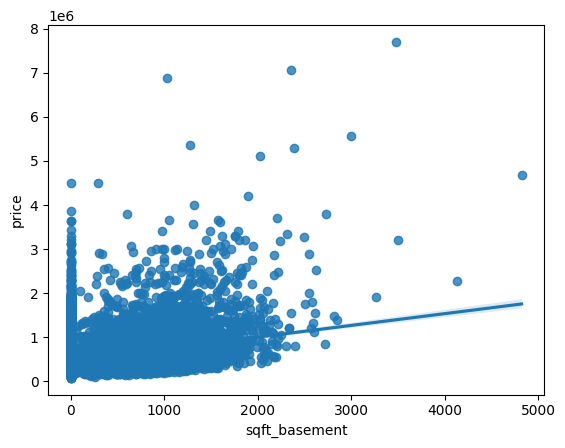

price


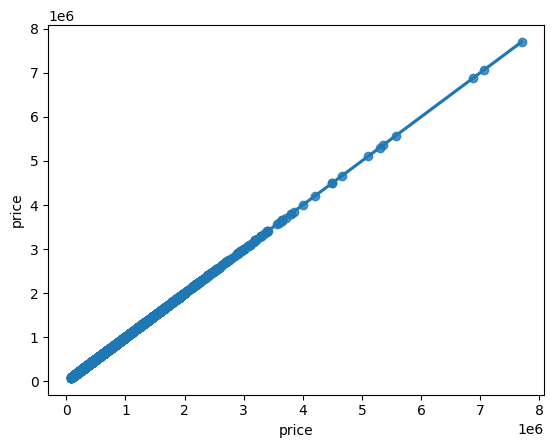

In [12]:
# Lets check for linearity
import matplotlib.pyplot as plt
import seaborn as sns
for col in selected_df2:
    print(col)
    sns.regplot(data=selected_df2, x=col, y='price')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='Count'>

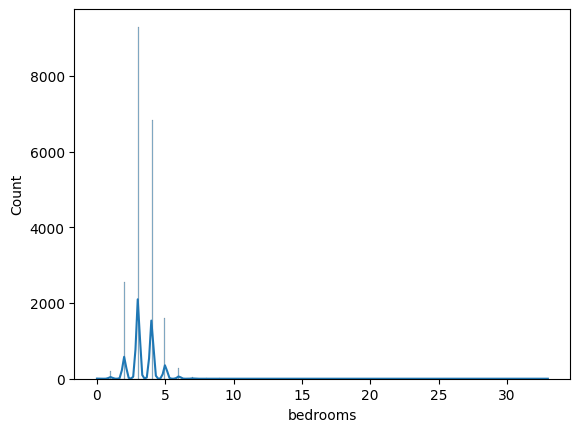

In [13]:
sns.histplot(data=selected_df2, x='bedrooms', kde=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedrooms', ylabel='Percent'>

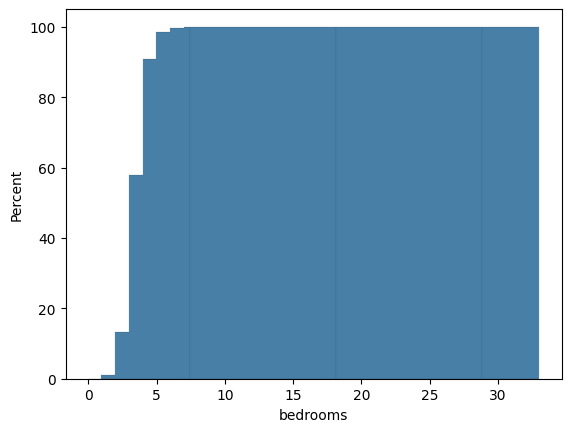

In [14]:
# Lets plot CDF of the bedrooms to see the cumulative distribution
sns.histplot(data=selected_df2, x='bedrooms', cumulative=True, stat='percent')

In [15]:
# Lets investigate the number of bedrooms more than 9
selected_df2[selected_df2['bedrooms']>9]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
8757,11,3.00,3000,4960,2400,600,520000.0
13314,10,5.25,4590,10920,2500,2090,1148000.0
15161,10,2.00,3610,11914,3010,600,650000.0
15870,33,1.75,1620,6000,1040,580,640000.0
19254,10,3.00,2920,3745,1860,1060,660000.0


In [16]:
# These 2 values are extreme outliers. So lets remove and draw the correlation plot again
selected_df3 = selected_df2[selected_df2['bedrooms']<=9]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathrooms', ylabel='Percent'>

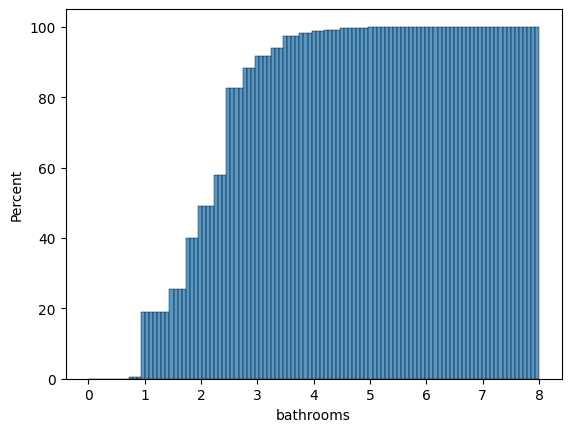

In [17]:
# Lets plot CDF of the bedrooms to see the cumulative distribution
sns.histplot(data=selected_df3, x='bathrooms', cumulative=True, stat='percent')

In [18]:
# Lets investigate the number of bathrooms more than 5
selected_df2[selected_df2['bathrooms']>6.5]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
4024,7,6.75,7480,41664,5080,2400,800000.0
7252,6,8.00,12050,27600,8570,3480,7700000.0
8092,5,6.75,9640,13068,4820,4820,4668000.0
8546,9,7.50,4050,6504,4050,0,450000.0
9254,6,7.75,9890,31374,8860,1030,6885000.0
12777,7,8.00,13540,307752,9410,4130,2280000.0


In [19]:
# These 2 values are extreme outliers. So lets remove and draw the correlation plot again
selected_df3 = selected_df3[selected_df3['bathrooms']<=6.5]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Percent'>

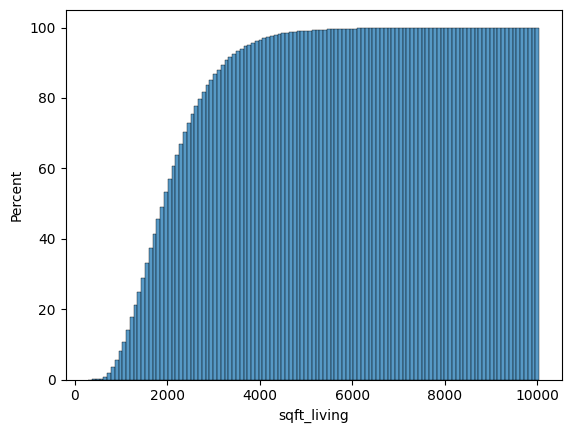

In [20]:
# Lets plot CDF of the sqft_living to see the cumulative distribution
sns.histplot(data=selected_df3, x='sqft_living', cumulative=True, stat='percent')

In [21]:
# Lets investigate the number of bathrooms more than 5
selected_df3 = selected_df3[selected_df3['sqft_living']<7000]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_lot', ylabel='Percent'>

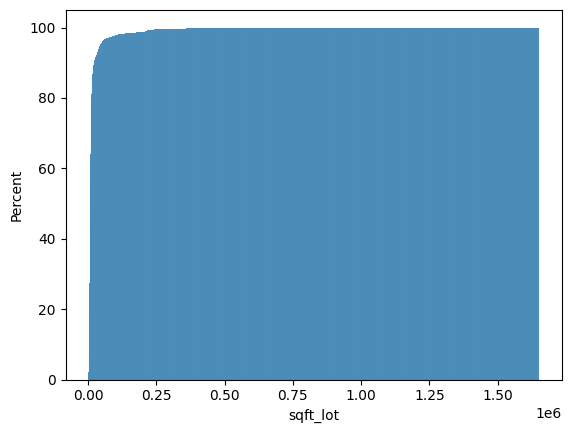

In [22]:
# Lets plot CDF of the sqft_lot to see the cumulative distribution
sns.histplot(data=selected_df3, x='sqft_lot', cumulative=True, stat='percent')

In [23]:
selected_df3 = selected_df3[selected_df3['sqft_lot']<0.5*1000_000]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_above', ylabel='Percent'>

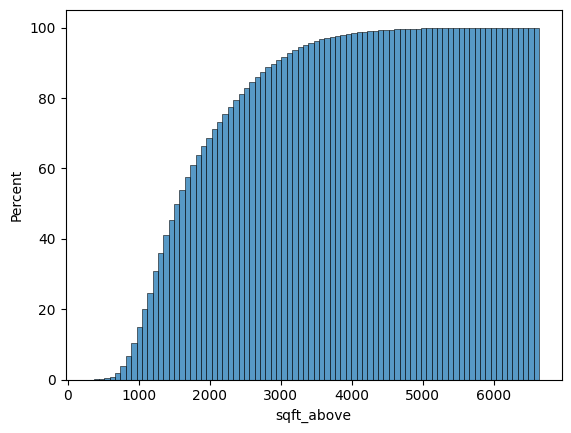

In [24]:
# Lets plot CDF of the sqft_above to see the cumulative distribution
sns.histplot(data=selected_df3, x='sqft_above', cumulative=True, stat='percent')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_basement', ylabel='Percent'>

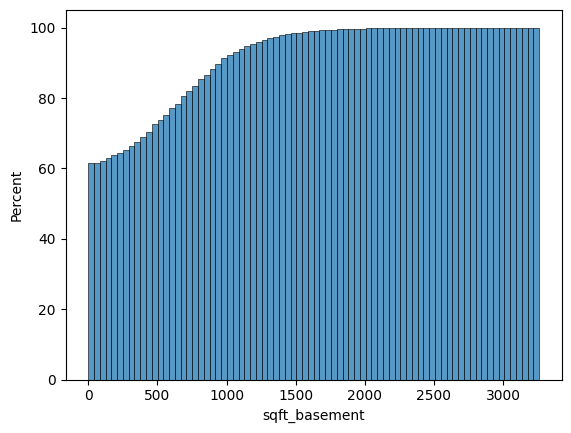

In [25]:
# Lets plot CDF of the sqft_living to see the cumulative distribution
sns.histplot(data=selected_df3, x='sqft_basement', cumulative=True, stat='percent')

In [26]:
selected_df3 = selected_df3[selected_df3['sqft_basement']<2350]

bedrooms


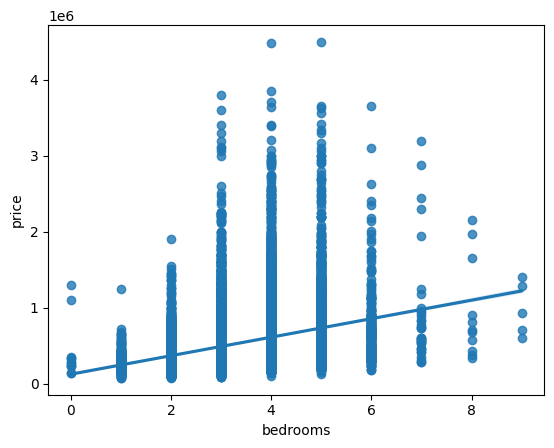

bathrooms


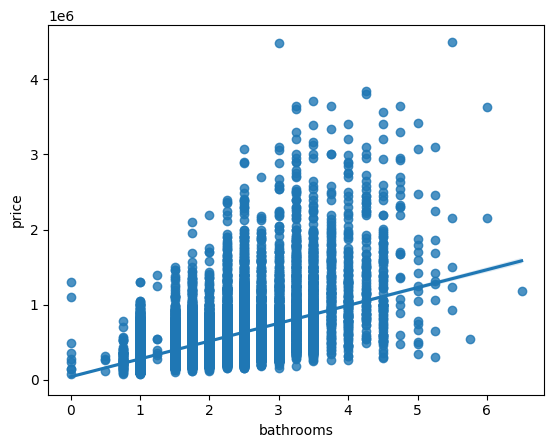

sqft_living


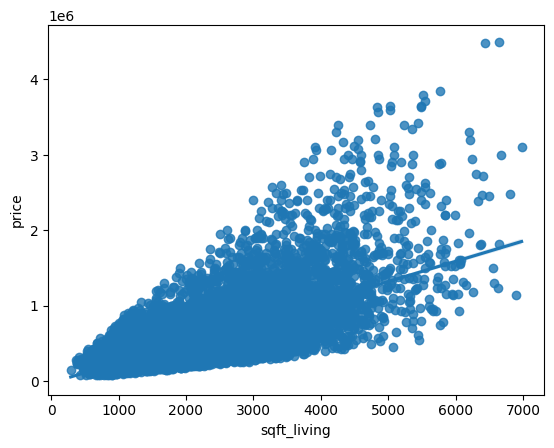

sqft_lot


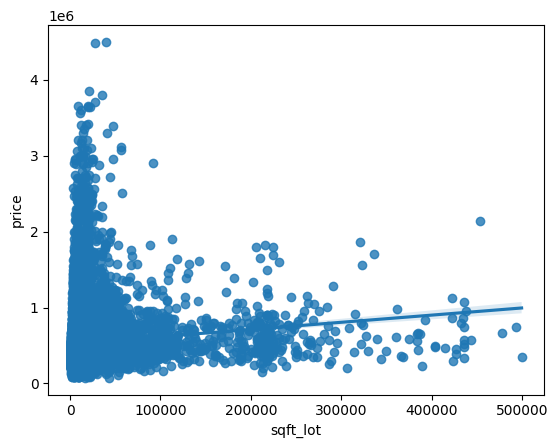

sqft_above


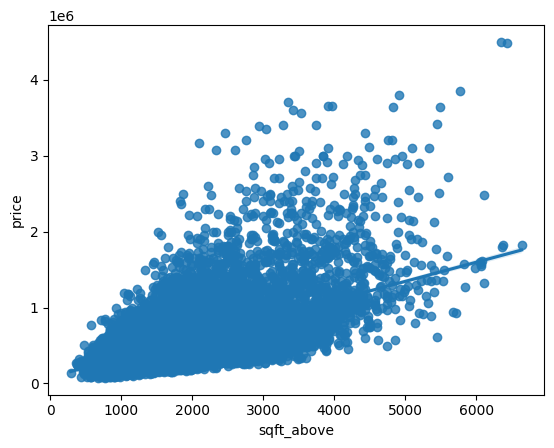

sqft_basement


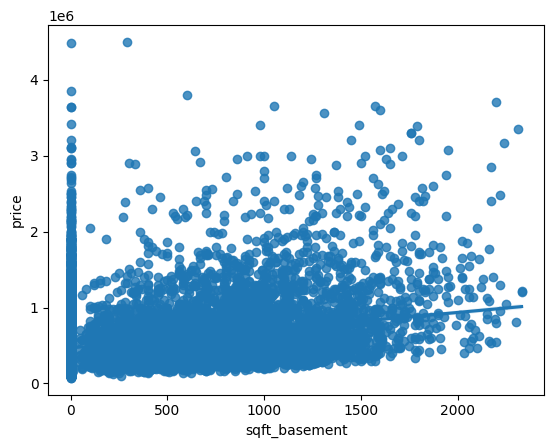

price


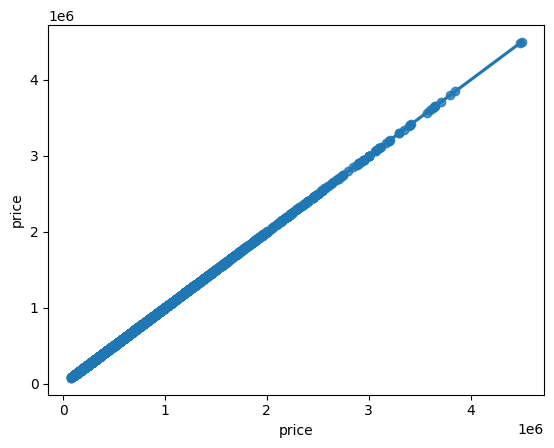

In [27]:
# Lets plot the regression line
# Lets check for linearity
import matplotlib.pyplot as plt
import seaborn as sns
for col in selected_df3:
    print(col)
    sns.regplot(data=selected_df3, x=col, y='price')
    plt.show()

In [28]:
# The histogram looks good, lets plot the residual plot after getting the prediction on each of the variables, before that lets normalize
import numpy as np

def standardize(col_val: np.array):
    return (col_val - col_val.mean()) / col_val.std()

In [29]:
df_normalized = pd.DataFrame()
for item in selected_df3:
    df_normalized[item] = standardize(selected_df3[item])

bedrooms


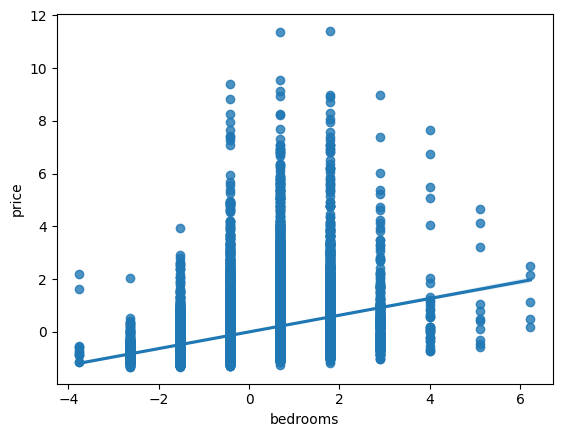

bathrooms


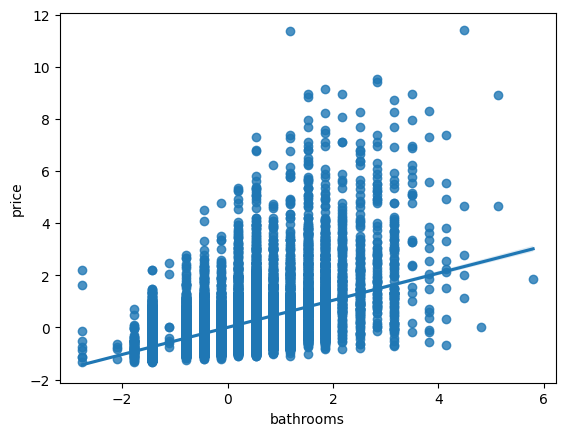

sqft_living


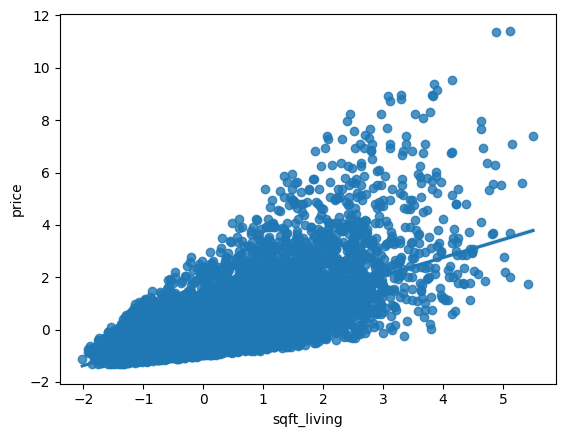

sqft_lot


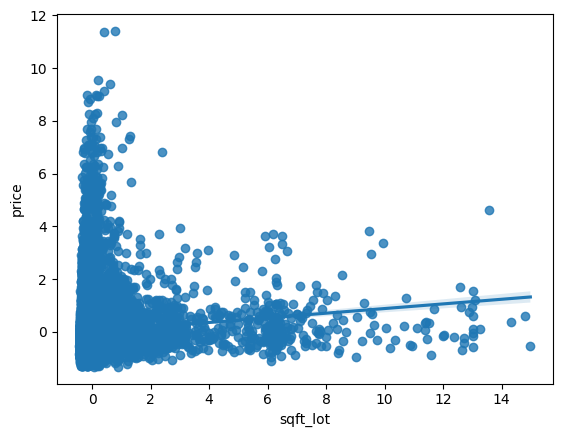

sqft_above


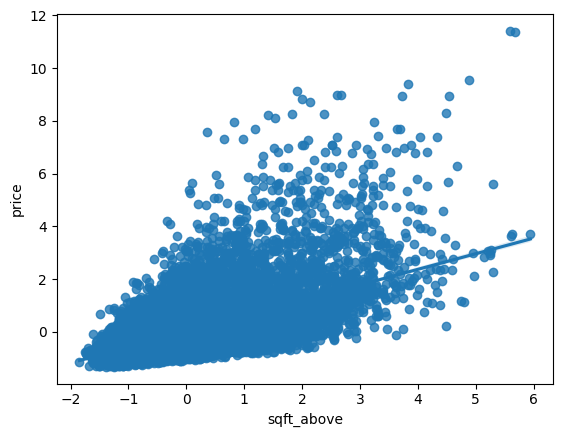

sqft_basement


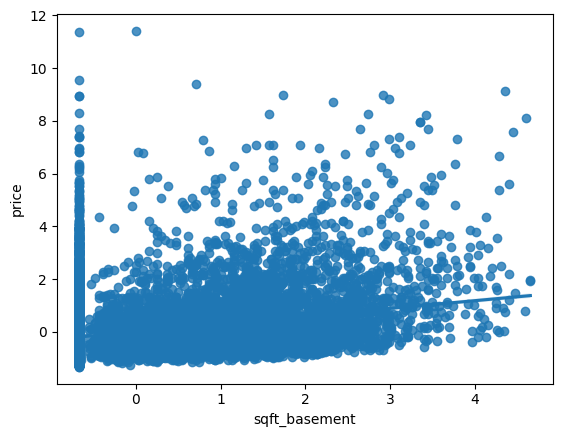

price


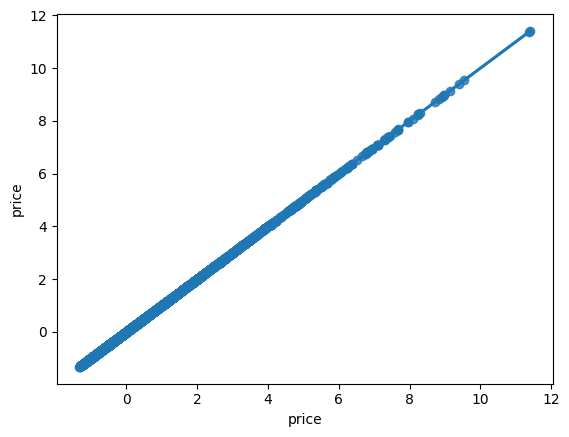

In [30]:
# Lets plot the regression line
# Lets check for linearity
import matplotlib.pyplot as plt
import seaborn as sns
for col in selected_df3:
    print(col)
    sns.regplot(data=df_normalized, x=col, y='price')
    plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:

lr = LinearRegression()
lr.fit(df_normalized[['bedrooms']], df_normalized['price'])
pred_ = lr.predict(df_normalized[['bedrooms']])

In [33]:
residuals = df_normalized['bedrooms'] - pred_

In [34]:
residuals

0       -0.292694
1       -0.292694
2       -1.051389
3        0.466001
4       -0.292694
           ...   
21606    0.466001
21609    0.466001
21610   -1.051389
21611   -0.292694
21612   -1.051389
Name: bedrooms, Length: 20755, dtype: float64

In [35]:
df_normalized['bedrooms']

0       -0.428127
1       -0.428127
2       -1.537876
3        0.681623
4       -0.428127
           ...   
21606    0.681623
21609    0.681623
21610   -1.537876
21611   -0.428127
21612   -1.537876
Name: bedrooms, Length: 20755, dtype: float64